# **라이브러리 불러오기**

In [188]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [189]:
import os
os.chdir('C:/Users/eunai/Documents/컴퓨터공부/dacon/open')

In [291]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
submission=pd.read_csv('sample_submission.csv')

# **[데이터 살펴보기]**

In [292]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [293]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [294]:
train.shape

(26457, 20)

In [295]:
test.shape

(10000, 19)

In [296]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

# **[데이터 전처리]**

In [297]:
data=pd.concat([train, test], axis=0)
data.shape

(36457, 20)

## **FLAG_MOBIL 제거** 

In [298]:
data.drop("FLAG_MOBIL",axis=1, inplace=True)
data.drop("occyp_type",axis=1,inplace=True)

In [299]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          36457 non-null  int64  
 1   gender         36457 non-null  object 
 2   car            36457 non-null  object 
 3   reality        36457 non-null  object 
 4   child_num      36457 non-null  int64  
 5   income_total   36457 non-null  float64
 6   income_type    36457 non-null  object 
 7   edu_type       36457 non-null  object 
 8   family_type    36457 non-null  object 
 9   house_type     36457 non-null  object 
 10  DAYS_BIRTH     36457 non-null  int64  
 11  DAYS_EMPLOYED  36457 non-null  int64  
 12  work_phone     36457 non-null  int64  
 13  phone          36457 non-null  int64  
 14  email          36457 non-null  int64  
 15  family_size    36457 non-null  float64
 16  begin_month    36457 non-null  float64
 17  credit         26457 non-null  float64
dtypes: floa

## **공선성제거**

<AxesSubplot:>

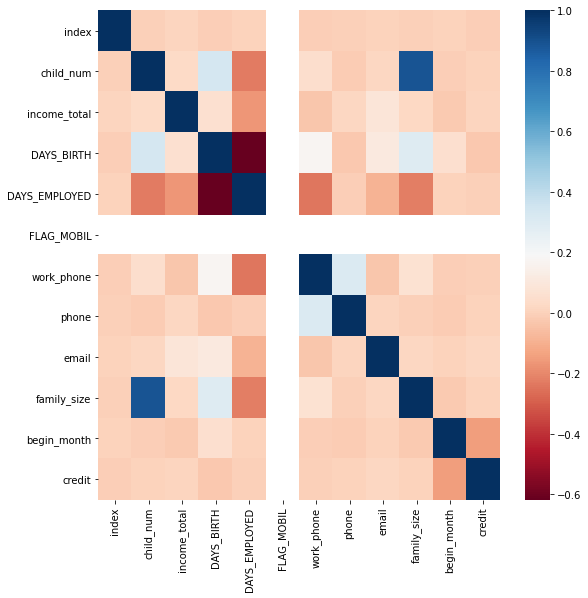

In [300]:
plt.figure(figsize =(9,9))
corr = train.corr()
sns.heatmap(corr,cmap='RdBu')

<AxesSubplot:xlabel='child_num', ylabel='family_size'>

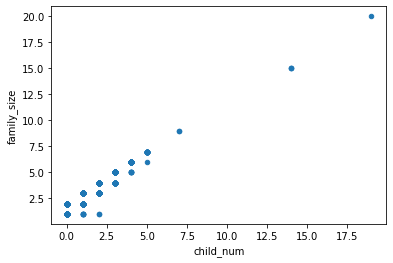

In [301]:
data.plot.scatter("child_num","family_size")

In [302]:
#data.drop("child_num",axis=1,inplace=True)

<AxesSubplot:>

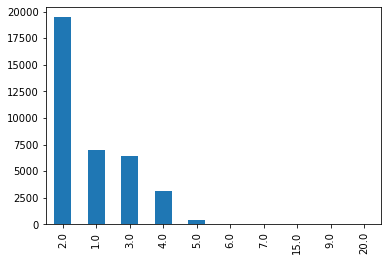

In [303]:
data['family_size'].value_counts(sort=True).plot.bar()

In [304]:
data.loc[data["family_size"]>=9]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit
8462,8462,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,0,0,0,15.0,-7.0,2.0
9021,9021,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,0,0,0,15.0,-58.0,2.0
10731,10731,F,N,Y,19,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-11057,-1853,1,1,0,20.0,-5.0,2.0
25313,25313,F,N,N,7,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13827,-1649,1,1,0,9.0,-26.0,2.0
25390,25390,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,0,0,0,15.0,-43.0,2.0
25638,25638,F,N,N,7,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13827,-1649,1,1,0,9.0,-31.0,2.0


In [305]:
data.loc[data['family_size'] >= 9,'family_size']=9

## **2. Binary variables**

In [306]:
data['gender'] = data['gender'].replace(['F','M'],[0,1])
print('gender :')
print(data['gender'].value_counts())
print('--------------')

print('Having a car or not : ')
data['car'] = data['car'].replace(['N','Y'],[0,1])
print(data['car'].value_counts())
print('--------------')

print('Having house reality or not: ')
data['reality'] = data['reality'].replace(['N','Y'],[0,1])
print(data['reality'].value_counts())
print('--------------')
      
print('Having a phone or not: ')
print(data['phone'].value_counts())
print('--------------')
      

print('Having a email or not: ')
print(data['email'].value_counts())
print('--------------')
      

print('Having a work phone or not: ')
print(data['work_phone'].value_counts())
print('--------------')

gender :
0    24430
1    12027
Name: gender, dtype: int64
--------------
Having a car or not : 
0    22614
1    13843
Name: car, dtype: int64
--------------
Having house reality or not: 
1    24506
0    11951
Name: reality, dtype: int64
--------------
Having a phone or not: 
0    25709
1    10748
Name: phone, dtype: int64
--------------
Having a email or not: 
0    33186
1     3271
Name: email, dtype: int64
--------------
Having a work phone or not: 
0    28235
1     8222
Name: work_phone, dtype: int64
--------------


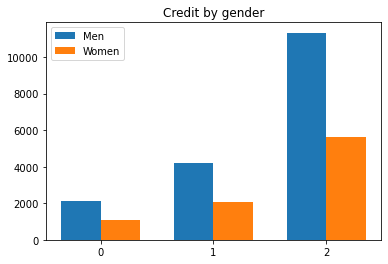

In [307]:
crd_m=list(sum(data.loc[data["credit"]==i]["gender"]==0) for i in range(0,3))
crd_w=list(sum(data.loc[data["credit"]==i]["gender"]==1) for i in range(0,3))

labels=np.arange(3)
width=0.35

fig, ax = plt.subplots()
rects1 = ax.bar(labels - width/2, crd_m, width, label='Men')
rects2 = ax.bar(labels + width/2, crd_w, width, label='Women')

ax.set_title('Credit by gender')
ax.set_xticks(labels)
ax.set_xticklabels(labels)
ax.legend()

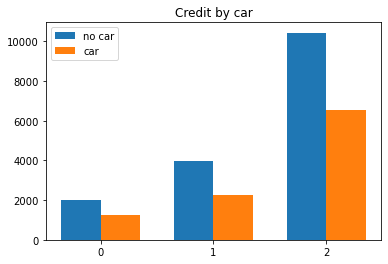

In [308]:
crd_nc=list(sum(data.loc[data["credit"]==i]["car"]==0) for i in range(0,3))
crd_c=list(sum(data.loc[data["credit"]==i]["car"]==1) for i in range(0,3))

labels=np.arange(3)
width=0.35

fig, ax = plt.subplots()
rects1 = ax.bar(labels - width/2, crd_nc, width, label='no car')
rects2 = ax.bar(labels + width/2, crd_c, width, label='car')

ax.set_title('Credit by car')
ax.set_xticks(labels)
ax.set_xticklabels(labels)
ax.legend()

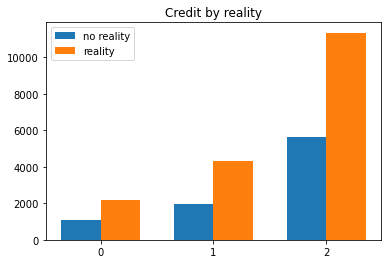

In [309]:
crd_nr=list(sum(data.loc[data["credit"]==i]["reality"]==0) for i in range(0,3))
crd_r=list(sum(data.loc[data["credit"]==i]["reality"]==1) for i in range(0,3))

labels=np.arange(3)
width=0.35

fig, ax = plt.subplots()
rects1 = ax.bar(labels - width/2, crd_nr, width, label='no reality')
rects2 = ax.bar(labels + width/2, crd_r, width, label='reality')

ax.set_title('Credit by reality')
ax.set_xticks(labels)
ax.set_xticklabels(labels)
ax.legend()

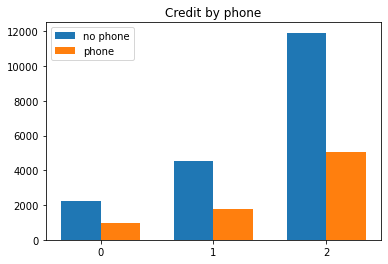

In [310]:
crd_np=list(sum(data.loc[data["credit"]==i]["phone"]==0) for i in range(0,3))
crd_p=list(sum(data.loc[data["credit"]==i]["phone"]==1) for i in range(0,3))

labels=np.arange(3)
width=0.35

fig, ax = plt.subplots()
rects1 = ax.bar(labels - width/2, crd_np, width, label='no phone')
rects2 = ax.bar(labels + width/2, crd_p, width, label='phone')

ax.set_title('Credit by phone')
ax.set_xticks(labels)
ax.set_xticklabels(labels)
ax.legend()

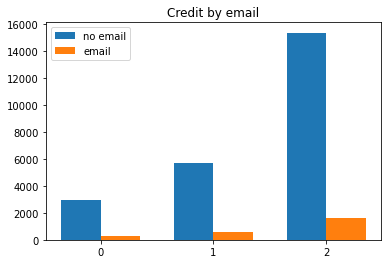

In [311]:
crd_ne=list(sum(data.loc[data["credit"]==i]["email"]==0) for i in range(0,3))
crd_e=list(sum(data.loc[data["credit"]==i]["email"]==1) for i in range(0,3))

labels=np.arange(3)
width=0.35

fig, ax = plt.subplots()
rects1 = ax.bar(labels - width/2, crd_ne, width, label='no email')
rects2 = ax.bar(labels + width/2, crd_e, width, label='email')

ax.set_title('Credit by email')
ax.set_xticks(labels)
ax.set_xticklabels(labels)
ax.legend()

## **3. Continuous variable**

### (1) child_num

<AxesSubplot:>

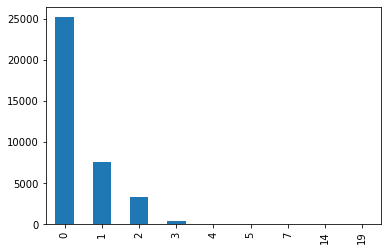

In [312]:
data['child_num'].value_counts(sort=False).plot.bar()

In [313]:
data.loc[data['child_num'] >= 2,'child_num']=2

### (2) inc

In [314]:
#sns.boxplot(data["credit"],data["income_total"])

In [315]:
#income=data["income_total"]
#quan_25 = np.percentile(income, 25)
#quan_75 = np.percentile(income, 75)

#iqr=quan_75-quan_25

#lowest = quan_25 - iqr * 6
#highest = quan_75 + iqr * 6

In [316]:
#print(lowest, highest)

In [317]:
#color = np.where(data.income_total>=highest, 'red','blue')
#data.plot(kind='scatter', x='credit', y='income_total',
#         s=50, c=color)

In [318]:
#data.loc[data['income_total'] >= highest,'income_total']=highest

In [319]:
#data['income_total'] = data['income_total'].astype(object)
#data.dtypes

In [320]:
#data['income_total'] = data['income_total']/10000 
#print(data['income_total'].value_counts(bins=10,sort=False))
#data['income_total'].plot(kind='hist',bins=50,density=True)

In [321]:
#count, bin_dividers =np.histogram(data['income_total'], bins=7)

In [322]:
#bin_names=['소득'+str(i) for i in range(7) ]
#data['income_total']=pd.cut(x=data['income_total'], bins=bin_dividers, labels=bin_names, include_lowest=True)

### **(3) Type**

In [323]:
print(data['income_type'].unique())
print(data['edu_type'].unique())
print(data['family_type'].unique())
print(data['house_type'].unique())

['Commercial associate' 'Working' 'State servant' 'Pensioner' 'Student']
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Married' 'Civil marriage' 'Separated' 'Single / not married' 'Widow']
['Municipal apartment' 'House / apartment' 'With parents'
 'Co-op apartment' 'Rented apartment' 'Office apartment']


In [324]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
data['income_type']=label_encoder.fit_transform(data['income_type'])
data['edu_type']=label_encoder.fit_transform(data['edu_type'])
data['family_type']=label_encoder.fit_transform(data['family_type'])
data['house_type']=label_encoder.fit_transform(data['house_type'])
data['income_total']=label_encoder.fit_transform(data['income_total'])

## **4. Minus continuous variable**

In [325]:
#minus 변경하고
#구간화 함수
#def make_bin(variable, n):
#    data[variable]=-data[variable]
#    count, bin_dividers =np.histogram(data[variable], bins=n)
#    bin_names=[str(i) for i in range(n)]
#    data[variable]=pd.cut(x=data[variable], bins=bin_dividers, labels=bin_names, include_lowest=True)
#    data[variable]=label_encoder.fit_transform(data[variable])

In [326]:
#data.columns

In [327]:
#make_bin('DAYS_BIRTH', n=10)
#make_bin('DAYS_EMPLOYED', n=6)
#make_bin('begin_month', n=4)

In [328]:
#data["DAYS_EMPLOYED"]=-data["DAYS_EMPLOYED"]

## **5. Scailing**

In [329]:
from sklearn.preprocessing import StandardScaler

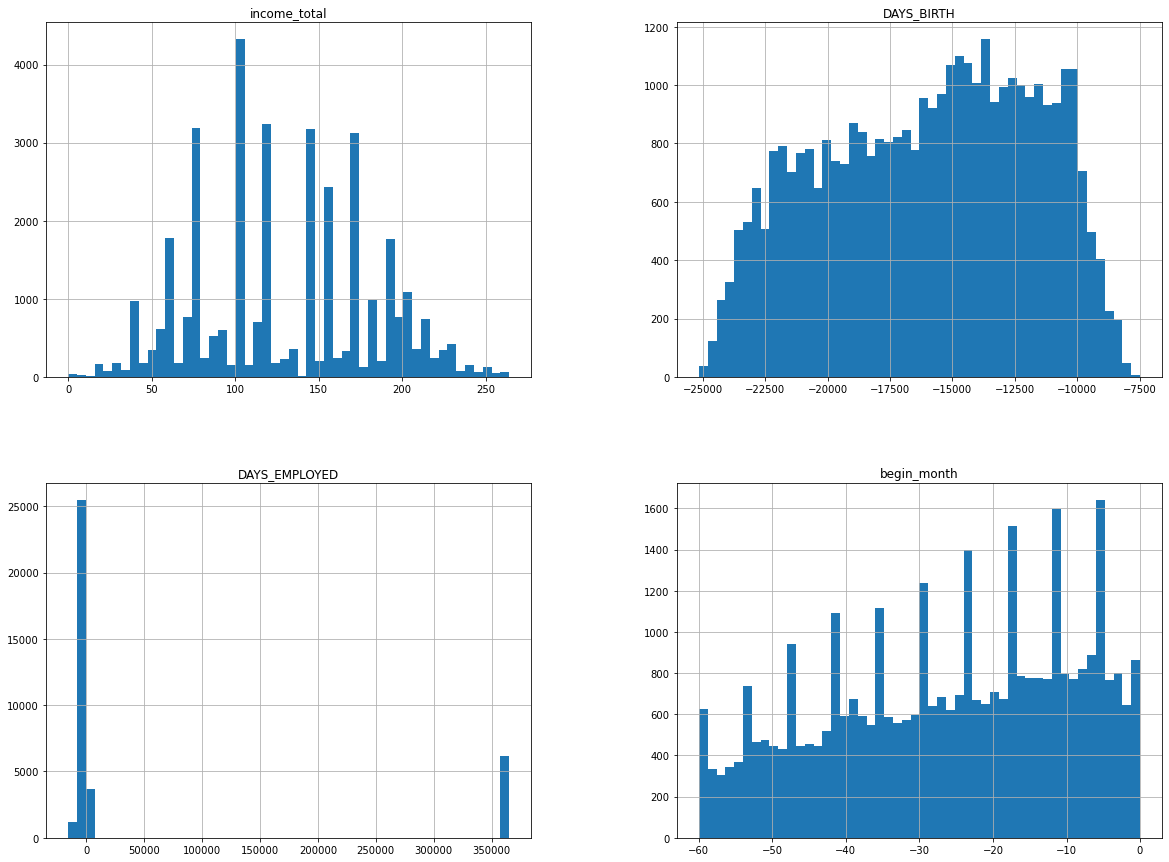

In [330]:
data_tmp=data[["income_total","DAYS_BIRTH","DAYS_EMPLOYED","begin_month"]]
data_tmp.hist(bins=50, figsize=(20,15))
plt.show()

In [331]:
scaler=StandardScaler()
scaler.fit(data_tmp)
tmp_prepared=scaler.transform(data_tmp)

prepared=pd.DataFrame(tmp_prepared,columns=data_tmp.columns, index=data_tmp.index)
prepared.head()

,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
0,0.529979,0.494269,-0.464745,1.221952
1,0.950974,1.093961,-0.441723,1.282552
2,1.907779,-0.740824,-0.462747,0.252350
3,0.529979,0.211207,-0.445733,-0.656651
4,-0.197193,0.223348,-0.445828,0.009950


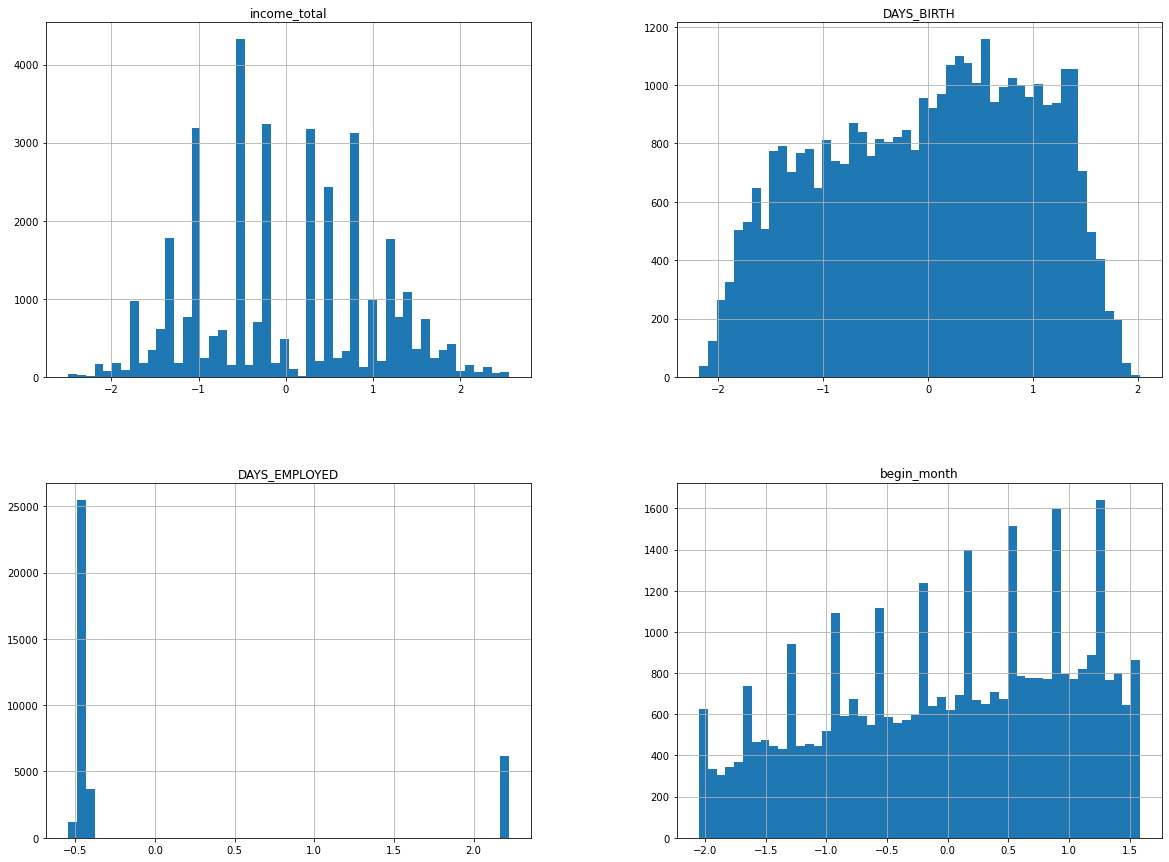

In [332]:
prepared.hist(bins=50, figsize=(20,15))
plt.show()

In [333]:
for c in prepared.columns:
    data[c]=prepared[c]
data

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit
0,0,0,0,0,0,0.529979,0,1,1,2,0.494269,-0.464745,0,0,0,2.0,1.221952,1.0
1,1,0,0,1,1,0.950974,0,4,0,1,1.093961,-0.441723,0,0,1,3.0,1.282552,1.0
2,2,1,1,1,0,1.907779,4,1,1,1,-0.740824,-0.462747,0,1,0,2.0,0.252350,2.0
3,3,0,0,1,0,0.529979,0,4,1,1,0.211207,-0.445733,0,1,0,2.0,-0.656651,0.0
4,4,0,1,1,0,-0.197193,2,1,1,1,0.223348,-0.445828,0,0,0,2.0,0.009950,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,1,1,0,0.529979,4,2,1,1,-0.623219,-0.470012,1,1,0,2.0,0.434151,NaN
9996,36453,1,1,1,0,0.529979,4,4,0,1,1.211566,-0.440088,1,0,0,2.0,-0.474851,NaN
9997,36454,0,0,1,0,1.276287,4,4,1,1,-1.200056,-0.532374,0,0,0,2.0,-1.747452,NaN
9998,36455,0,1,0,0,0.281210,0,4,1,1,-0.134705,-0.438418,0,1,0,2.0,-0.414250,NaN


# **[데이터 모델링]**

In [334]:
len(data)

36457

In [335]:
train=data[:len(data)-10000]
test=data[len(data)-10000:]

In [336]:
train.shape

(26457, 18)

In [337]:
test.shape

(10000, 18)

In [338]:
train_x=train.drop('credit', axis=1)
train_y=train[['credit']]
test_x=test.drop('credit', axis=1)

In [339]:
print(train_x.shape, train_y.shape, test_x.shape)

(26457, 17) (26457, 1) (10000, 17)


In [340]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score
from tensorflow.keras.utils import to_categorical

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, 
                                                    stratify=train_y, test_size=0.25,
                                                    random_state = 10086)

print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)


clf=RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict_proba(X_val)

print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")

Train set: 
(19842, 17)
(19842, 1)
Validation set: 
(6615, 17)
(6615, 1)
log_loss: 0.7562219918584813


In [341]:
from sklearn.model_selection import KFold, StratifiedKFold

def run_kfold(clf):
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
    outcomes=[]
    sub=np.zeros((test_x.shape[0], 3))  
    for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
        X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
        y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
        clf.fit(X_train, y_train)
        
        predictions=clf.predict_proba(X_val)
        logloss=log_loss(to_categorical(y_val['credit']), predictions)
        outcomes.append(logloss)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        
        sub+=clf.predict_proba(test_x)
        
        
    mean_outcome=np.mean(outcomes)
    
    print("Mean:{}".format(mean_outcome))
    return sub/folds.n_splits

my_submission = run_kfold(clf)

FOLD 0 : logloss:0.7520101857656086
FOLD 1 : logloss:0.7493421429646492
FOLD 2 : logloss:0.7695900843594689
FOLD 3 : logloss:0.7502307547191713
FOLD 4 : logloss:0.7486426201885681
Mean:0.7539631575994932


In [342]:
my_submission

array([[0.106, 0.278, 0.616],
       [0.228, 0.16 , 0.612],
       [0.07 , 0.276, 0.654],
       ...,
       [0.068, 0.164, 0.768],
       [0.158, 0.356, 0.486],
       [0.118, 0.272, 0.61 ]])

In [343]:
submission

,index,0,1,2
0,26457,0,0,0
1,26458,0,0,0
2,26459,0,0,0
3,26460,0,0,0
4,26461,0,0,0
...,...,...,...,...
9995,36452,0,0,0
9996,36453,0,0,0
9997,36454,0,0,0
9998,36455,0,0,0


In [344]:
submission.loc[:,1:]=my_submission

In [345]:
submission

,index,0,1,2
0,26457,0.106,0.278,0.616
1,26458,0.228,0.160,0.612
2,26459,0.070,0.276,0.654
3,26460,0.120,0.228,0.652
4,26461,0.170,0.312,0.518
...,...,...,...,...
9995,36452,0.132,0.360,0.508
9996,36453,0.132,0.360,0.508
9997,36454,0.068,0.164,0.768
9998,36455,0.158,0.356,0.486


In [346]:
#os.chdir('../baseline')

In [347]:
submission.to_csv('C:\\Users\\eunai\\Documents\\컴퓨터공부\dacon\\baseline_submission_8_2.csv', index=False)